<a href="https://colab.research.google.com/github/justin-hsieh/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_114_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas
-work with dataframe filtering, list comprehensions, apply functions

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [23]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-07-12 03:29:16--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.2’

LoanStats_2018Q4.cs     [                <=> ]  21.51M   810KB/s    in 27s     

2019-07-12 03:29:44 (803 KB/s) - ‘LoanStats_2018Q4.csv.zip.2’ saved [22559146]



In [24]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [25]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('LoanStats_2018Q4.csv')

 # some columns are truncated though and you need to be able to see them. These options will help make them all viewable
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


df.head() # notice that the data is bolded, thinks they are all headers

In [0]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows =1) #skiprows arg helps with the problem above
df.head()

In [28]:
df.shape

(128414, 144)

In [0]:
df.isnull().sum() # there are several features with 2 values... check the bottom of the data! with tail()

In [0]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows =1, skipfooter=2, engine='python')
df.head()

In [0]:
df.isnull().sum().sort_values(ascending=False)

In [0]:
df.drop(['id','url','desc','member_id'], axis='columns', inplace=True)
#or
#df = df.drop(['id','url','desc','member_id'], axis='columns') 
#this convention is better than using inplace=True because it will be deprecated in the future
#also helps you save a copy and avoids taking a while to run each cell seperately again if you mess up
#Good practice to make a copy of your dataframe


In [0]:
df.head()

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [0]:
df.dtypes

In [35]:
df.head()
#notice in the interest rate column it is considered a string, rather than a number. Must be able to convert to a number
#type casting: convert one type into another


float('17.97%'.strip('%')) # get rid of percent sign and then cast to a float


17.97

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
def remove_percent(string):
  return float(string.strip('%'))

Apply the function to the `int_rate` column

In [0]:
df['int_rate'] = df['int_rate'].apply(remove_percent)

In [0]:
df.head()

In [39]:
#list Comprehension
example_list = ['13.5%','13.57%','13.58%']
[remove_percent(string) for string in example_list]

[13.5, 13.57, 13.58]

### Clean `emp_title`

Look at top 20 titles

In [0]:
df['emp_title'].value_counts(dropna= False).head(20)

How often is `emp_title` null?

In [41]:
df['emp_title'].isnull().sum()

20947

Clean the title and handle missing values

In [0]:
import numpy as np
examples = ['owner','Supervisor',' Project Manager', np.NaN]

In [43]:
def clean_title(title):
  if isinstance(title,str):
    return title.strip().title()
  else:
    return "unknown"
  return title.strip()

[clean_title(x) for x in examples]

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [0]:
df["emp_title"] = df['emp_title'].apply(clean_title)

In [0]:
df['emp_title'].value_counts(dropna= False).head(20)

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
df = df.apply(lambda x: x.str.strip().str.title() if x.dtype =='object' else x)

In [0]:
df['emp_title_manager'] = df['emp_title'].str.contains('Manager') #Make new column with instances that exist in another column 'contains manager'
df.head()

In [0]:
# Dataframe Filtering

managers = df[df['emp_title_manager'] ==True] #contains dataframe where only rows where manager is true come backs
plebians = df[df['emp_title_manager']==False]

In [49]:
print(managers['int_rate'].mean())
print(plebians['int_rate'].mean())

12.760582149647126
12.957349045509492


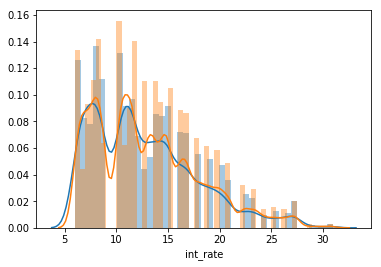

In [50]:
import seaborn as sns
sns.distplot(managers['int_rate']);
sns.distplot(plebians['int_rate']);

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [51]:
df['issue_d'].head().values

array(['Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018'],
      dtype=object)

In [52]:
df['issue_d'].describe()

count       128412
unique           3
top       Oct-2018
freq         46305
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [54]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
df['issue_d'].dt.year # similar to contains method, gives you just the year of the loans


In [0]:
df['issue_year'] = df['issue_d'].dt.year

In [57]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], infer_datetime_format=True)

In [0]:
df['issue_d'] - df['earliest_cr_line']

In [0]:
df['days_from_earliest_cr_to_issue'] = (df['issue_d'] - df['earliest_cr_line']).dt.days
df.head()

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
def remove_string(string):  # function to remove the string 'months'
  return int(string.strip('Months')) # converts string to int 

In [0]:
df['term'] = df['term'].apply(remove_string) # applies function to the whole column
df.head()

In [0]:
def loan_status(string): # determines what to return from the loan_status column
  if string == 'Current' or string == 'Fully Paid':
    return 1
  else:
    return 0
  

In [64]:
df['loan_status_is_great'] = df['loan_status'].apply(loan_status) #applies function to column and inputs the result into a new column
df['loan_status_is_great'].value_counts() #counts the values in the new column

1    124299
0      4113
Name: loan_status_is_great, dtype: int64

In [65]:
df['last_pymnt_d'].isna().sum()

159

In [0]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True) #converts date to datetime format

df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month #Extracts month
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year #Extract year
df.head().T

In [67]:
df['last_pymnt_d_year'].replace({pd.NaT:'0'}, inplace=True) # converts the NaT values to '0'
df['last_pymnt_d_year'] = df['last_pymnt_d_year'].astype(int) # converts the column values into ints
df['last_pymnt_d_year'].value_counts()

# Another option would be removing the rows that have a NaT or '0' value

2019    126286
2018      1967
0          159
Name: last_pymnt_d_year, dtype: int64

In [0]:
df['last_pymnt_d_month'].replace({pd.NaT:'0'}, inplace=True) # converts the NaT values to '0'
df['last_pymnt_d_month'] = df['last_pymnt_d_month'].astype(int) # converts the column values into ints
df['last_pymnt_d_month'].value_counts()

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

In [0]:
df['revol_util'] = df['revol_util'].fillna('0')

In [0]:
df['revol_util'].isna().sum()

In [0]:
#df['revol_util'] = df['revol_util'].apply(lambda x: x.strip('%'))

In [0]:
df['revol_util'] = df['revol_util'].apply(remove_percent)


In [0]:
df.head()

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01